### Crime Data Analysis


#### This dataset contains records of crimes that occurred in the year **2020**, reported across various police divisions. It includes details such as crime type, location, time, victim demographics, and case status.


In [1]:
#### These are the Column definations

# Unnamed: 0       -> Auto-generated index column from CSV export (can be dropped)
# DR_NO            -> Unique identifier for each crime incident
# Date Rptd        -> Date the crime was reported to the police
# DATE OCC         -> Date the crime actually occurred
# TIME OCC         -> Time the crime occurred (in 24-hour format, e.g., 1430 = 2:30 PM)
# AREA             -> Numeric code for police area/division
# AREA NAME        -> Name of the police division where the crime occurred
# Rpt Dist No      -> Reporting district number within the police division
# Part 1-2         -> Classification: Part 1 = Serious crimes, Part 2 = Less serious crimes
# Crm Cd           -> Crime code (numeric) that represents the type of crime
# Crm Cd Desc      -> Description of the crime (e.g., BURGLARY, THEFT)
# Mocodes          -> Modus Operandi codes describing how the crime was committed
# Vict Age         -> Age of the victim
# Vict Sex         -> Sex of the victim (M, F, X)
# Vict Descent     -> Ethnic descent of the victim (e.g., W = White, H = Hispanic)
# Premis Cd        -> Code representing the type of premises where the crime occurred
# Premis Desc      -> Description of the premises (e.g., STREET, RESIDENCE)
# Weapon Used Cd   -> Code for weapon used (if any)
# Weapon Desc      -> Description of the weapon used
# Status           -> Case status code (e.g., IC = Investigation Continuing)
# Status Desc      -> Description of the case status
# Crm Cd 1         -> Primary crime code associated with the incident
# Crm Cd 2         -> Secondary crime code (if any)
# Crm Cd 3         -> Tertiary crime code (rarely used)
# LOCATION         -> Textual description of the location where the crime occurred
# LAT              -> Latitude coordinate of the crime location
# LON              -> Longitude coordinate of the crime location

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("Crime_Data.csv")

In [4]:
df.head()

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,LOCATION,LAT,LON
0,0,190326475,03-01-2020 00:00,03-01-2020 00:00,2130,7,Wilshire,784,1,510,...,NaN,NaN,AA,Adult Arrest,510,998.0,NaN,1900 S LONGWOOD AV,34.0375,-118.3506
1,1,200106753,02-09-2020 00:00,02-08-2020 00:00,1800,1,Central,182,1,330,...,NaN,NaN,IC,Invest Cont,330,998.0,NaN,1000 S FLOWER ST,34.0444,-118.2628
2,2,200320258,11-11-2020 00:00,11-04-2020 00:00,1700,3,Southwest,356,1,480,...,NaN,NaN,IC,Invest Cont,480,NaN,NaN,1400 W 37TH ST,34.0210,-118.3002
3,3,200907217,05-10-2023 00:00,03-10-2020 00:00,2037,9,Van Nuys,964,1,343,...,NaN,NaN,IC,Invest Cont,343,NaN,NaN,14000 RIVERSIDE DR,34.1576,-118.4387
4,4,200412582,09-09-2020 00:00,09-09-2020 00:00,630,4,Hollenbeck,413,1,510,...,NaN,NaN,IC,Invest Cont,510,NaN,NaN,200 E AVENUE 28,34.0820,-118.2130


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   DR_NO           5000 non-null   int64  
 2   Date Rptd       5000 non-null   object 
 3   DATE OCC        5000 non-null   object 
 4   TIME OCC        5000 non-null   int64  
 5   AREA            5000 non-null   int64  
 6   AREA NAME       5000 non-null   object 
 7   Rpt Dist No     5000 non-null   int64  
 8   Part 1-2        5000 non-null   int64  
 9   Crm Cd          5000 non-null   int64  
 10  Crm Cd Desc     5000 non-null   object 
 11  Mocodes         4287 non-null   object 
 12  Vict Age        5000 non-null   int64  
 13  Vict Sex        4310 non-null   object 
 14  Vict Descent    4310 non-null   object 
 15  Premis Cd       5000 non-null   int64  
 16  Premis Desc     4995 non-null   object 
 17  Weapon Used Cd  1885 non-null   f

In [6]:
df.shape

(5000, 27)

In [7]:
df.isna().sum()

Unnamed: 0           0
DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA                 0
AREA NAME            0
Rpt Dist No          0
Part 1-2             0
Crm Cd               0
Crm Cd Desc          0
Mocodes            713
Vict Age             0
Vict Sex           690
Vict Descent       690
Premis Cd            0
Premis Desc          5
Weapon Used Cd    3115
Weapon Desc       3115
Status               0
Status Desc          0
Crm Cd 1             0
Crm Cd 2          4569
Crm Cd 3          4988
LOCATION             0
LAT                  0
LON                  0
dtype: int64

### Handling Missing Values

In [8]:
# --- Data Cleaning ---
df["Mocodes"].fillna("Null", inplace=True)
df["Vict Sex"].fillna("Unknown", inplace=True)
df["Vict Descent"].fillna("Unknown", inplace=True)
df["Premis Desc"].fillna("Unknown", inplace=True)

df["Weapon Desc"].fillna("Unknown", inplace=True)
df["Weapon Used Cd"].fillna("N/A", inplace=True)

# drop columns Crm Cd 1,Crm Cd 2,Crm Cd 3 because the avearge of missing values is more than 95%

df.drop(columns=['Crm Cd 1','Crm Cd 2','Crm Cd 3'],inplace=True)

C:\Users\Rushi\AppData\Local\Temp\ipykernel_11424\3181029983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Mocodes"].fillna("Null", inplace=True)
C:\Users\Rushi\AppData\Local\Temp\ipykernel_11424\3181029983.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [9]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

### Exploratory Data Analysis

In [10]:
# OBJECTIVE 1: Analyze and Visualize Top 10 Crime Categories
crime_counts = df['Crm Cd Desc'].value_counts()
top_crimes = crime_counts.head(10)

In [11]:
top_crimes.head(10)

Crm Cd Desc
VEHICLE - STOLEN                                           593
BATTERY - SIMPLE ASSAULT                                   428
BURGLARY FROM VEHICLE                                      352
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    343
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             284
INTIMATE PARTNER - SIMPLE ASSAULT                          271
BURGLARY                                                   263
THEFT PLAIN - PETTY ($950 & UNDER)                         252
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            225
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                   177
Name: count, dtype: int64

In [12]:

short_labels = {
    'VEHICLE - STOLEN': 'Stolen Vehicle',
    'BATTERY - SIMPLE ASSAULT': 'Battery Assault',
    'BURGLARY FROM VEHICLE': 'Burglary (Vehicle)',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Felony Vandalism',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Aggr. Assault w/ Weapon',
    'INTIMATE PARTNER - SIMPLE ASSAULT': 'IP Assault',
    'BURGLARY': 'Burglary',
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Petty Theft',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Theft from Vehicle',
    'VANDALISM - MISDEMEANOR ($399 OR UNDER)': 'Misdemeanor Vandalism'
}

top_crimes.index = top_crimes.index.map(short_labels)

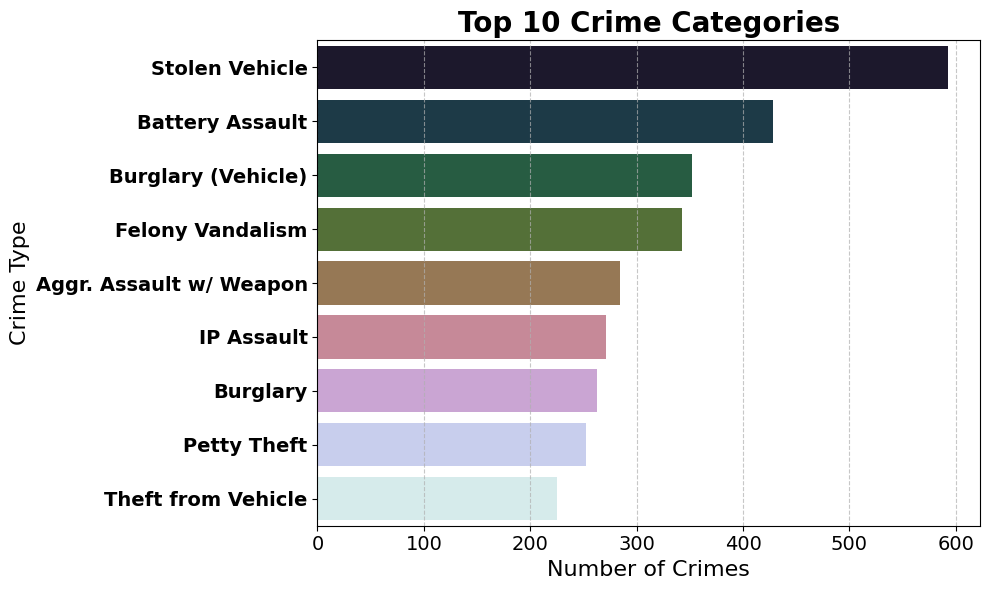

In [13]:
# Top 10 Crime Categories Bar Plot (Future-Proof)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_crimes.values, y=top_crimes.index, hue=top_crimes.index,
            palette="cubehelix", legend=False)
plt.title("Top 10 Crime Categories", fontsize=20, weight='bold')
plt.xlabel("Number of Crimes", fontsize=16)
plt.ylabel("Crime Type", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


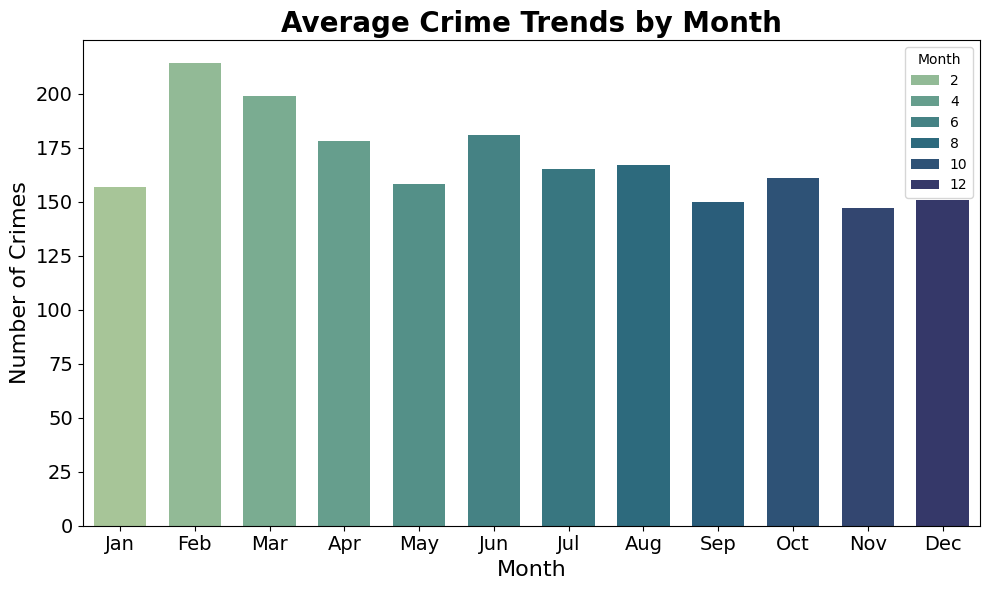

In [14]:
# OBJECTIVE 2: Time-Series Analysis of Crime Trends by Month and Year
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
df['Day'] = df['DATE OCC'].dt.day

df_filtered = df[(df['Year'] >= 2000) & (df['Year'] <= pd.Timestamp.now().year)]
crime_trends_by_month = df.groupby('Month').size()

# Enhanced Time Series Analysis (Average Crime Trends by Month)
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_trends_by_month.index, y=crime_trends_by_month.values, hue=crime_trends_by_month.index,palette="crest", width=0.7)
plt.title("Average Crime Trends by Month", fontsize=20, weight='bold')
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of Crimes", fontsize=16)
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()


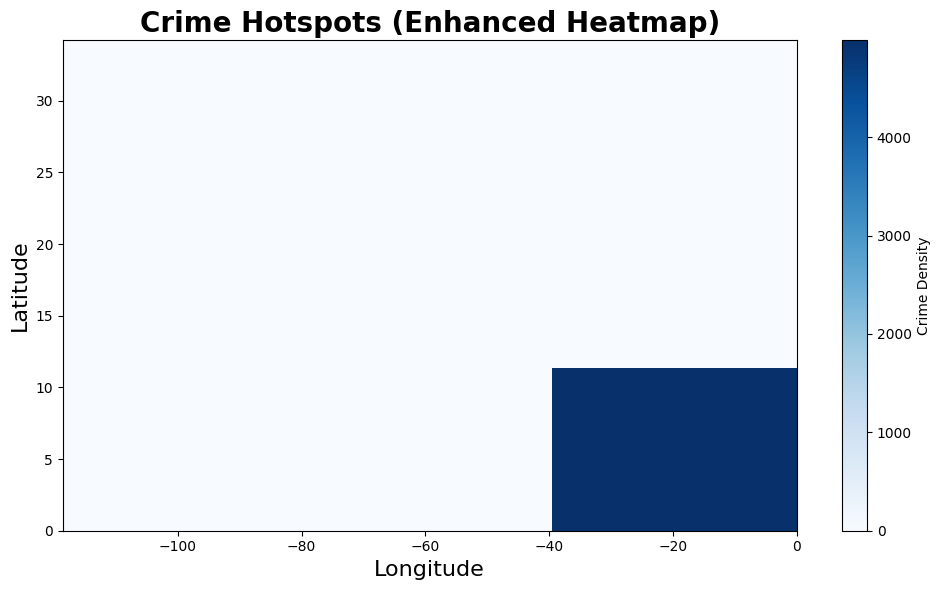

In [15]:
# OBJECTIVE 3: Crime Hotspot Detection Using Grid-Based Heatmap
lat_bins = np.linspace(df["LAT"].min(), df["LAT"].max(), 4)
lon_bins = np.linspace(df["LON"].min(), df["LON"].max(), 4)

crime_density, _, _ = np.histogram2d(df["LAT"], df["LON"], bins=[lat_bins, lon_bins])

# Enhanced Heatmap with Light Shades
plt.figure(figsize=(10, 6))
plt.imshow(crime_density.T, cmap='Blues', origin='lower', aspect='auto',
           extent=[df["LON"].min(), df["LON"].max(), df["LAT"].min(), df["LAT"].max()])
plt.colorbar(label='Crime Density')
plt.title("Crime Hotspots (Enhanced Heatmap)", fontsize=20, weight='bold')
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)
plt.tight_layout()

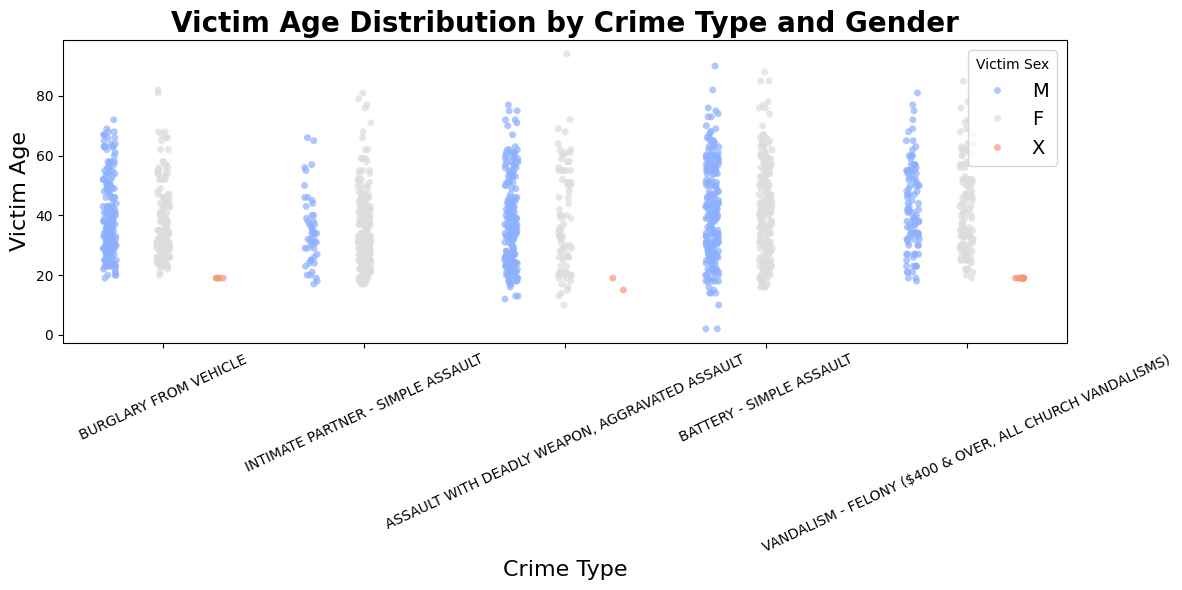

In [16]:
# OBJECTIVE 4: Victim Age Distribution by Crime Type and Gender
df_valid = df[(df['Vict Age'] > 0) & (df['Vict Age'] <= 100)]
top5_crimes = df_valid['Crm Cd Desc'].value_counts().head(5).index
df_top5 = df_valid[df_valid['Crm Cd Desc'].isin(top5_crimes)]

# Stripplot for Victim Age Distribution by Crime Type and Gender
plt.figure(figsize=(12, 6))
sns.stripplot(data=df_top5, x='Crm Cd Desc', y='Vict Age', hue='Vict Sex', 
              jitter=True, dodge=True, alpha=0.7, palette='coolwarm')
plt.title("Victim Age Distribution by Crime Type and Gender", fontsize=20, weight='bold')
plt.xlabel("Crime Type", fontsize=16)
plt.ylabel("Victim Age", fontsize=16)
plt.xticks(rotation=25, fontsize=10)
plt.legend(title='Victim Sex', fontsize=14)
plt.tight_layout()
plt.show()

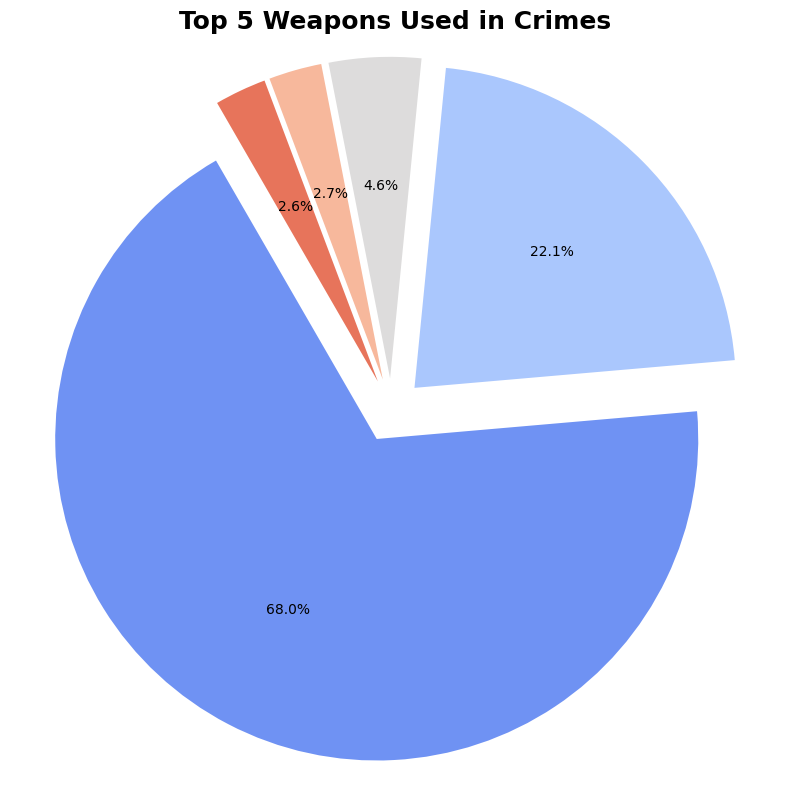

In [17]:
# OBJECTIVE 5: Analyze Top 5 Weapons Used in Crimes
weapon_counts = df['Weapon Desc'].value_counts().head(5)

# Enhanced Pie Chart (Exploded View & Color Palette)
plt.figure(figsize=(8, 8))  # Increased size of the pie chart
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # Exploding each slice slightly

# Create the pie chart without labels, displaying only percentages
colors = sns.color_palette("coolwarm", n_colors=len(weapon_counts))  # Ensure correct number of colors
plt.pie(weapon_counts, autopct='%1.1f%%', startangle=120, colors=colors, explode=explode, labels=None)

plt.title("Top 5 Weapons Used in Crimes", fontsize=18, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout()
plt.show()

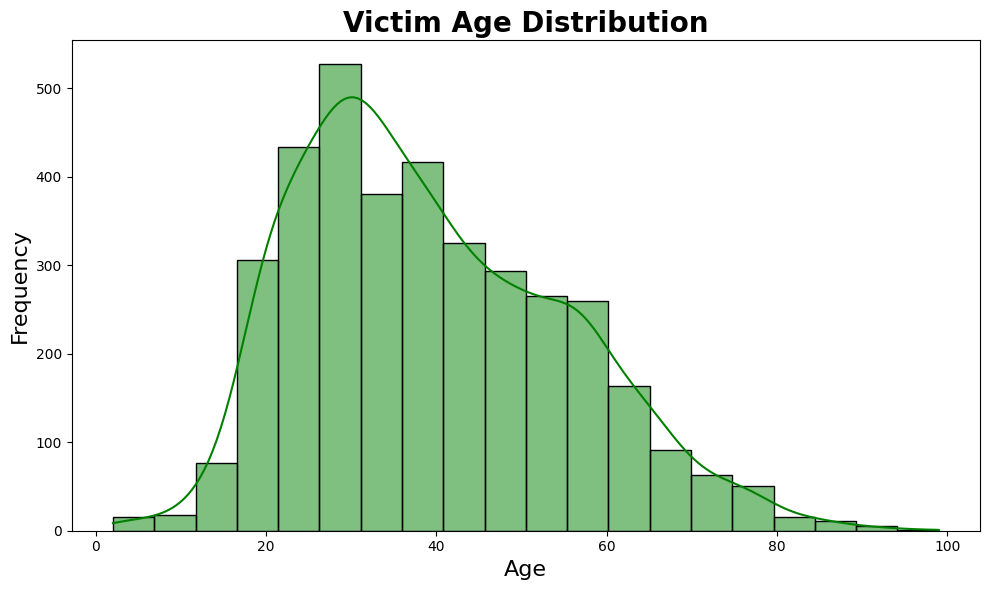

In [18]:
# OBJECTIVE 6: Victim Age Distribution (Histogram)
df_valid = df[(df['Vict Age'] > 0) & (df['Vict Age'] <= 100)]

# Histogram for Victim Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_valid['Vict Age'], bins=20, kde=True, color="green")
plt.title("Victim Age Distribution", fontsize=20, weight='bold')
plt.xlabel("Age", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.tight_layout()
plt.show()

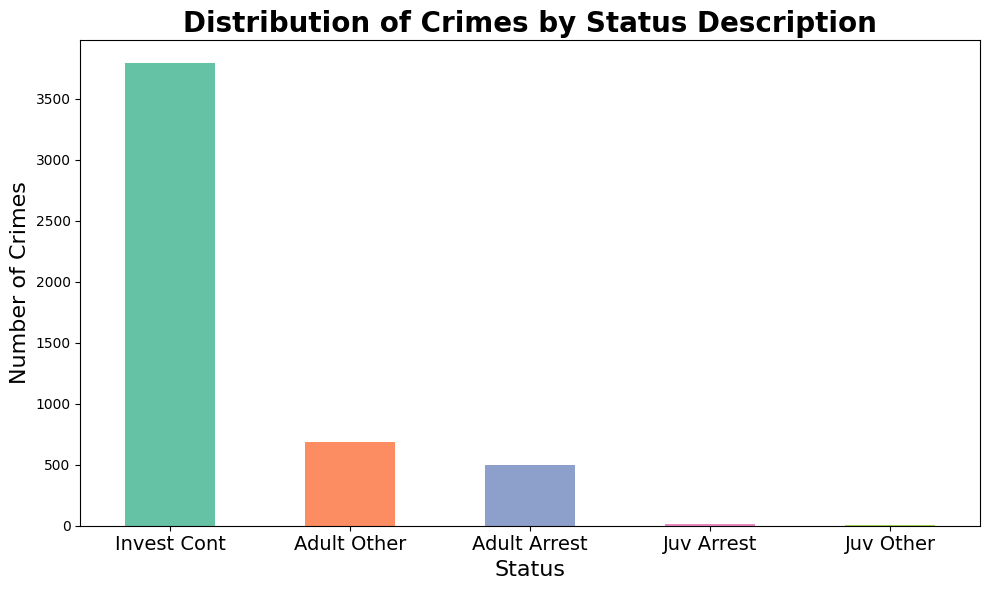

In [19]:
# OBJECTIVE 7: Analyze Crime Distribution by Status Description 
status_desc_counts = df['Status Desc'].value_counts()

# Bar Plot for Crime Distribution by Status Description
plt.figure(figsize=(10, 6))
status_desc_counts.plot(kind='bar', color=sns.color_palette("Set2"))
plt.title("Distribution of Crimes by Status Description", fontsize=20, weight='bold')
plt.xlabel("Status", fontsize=16)
plt.ylabel("Number of Crimes", fontsize=16)
plt.xticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.show()

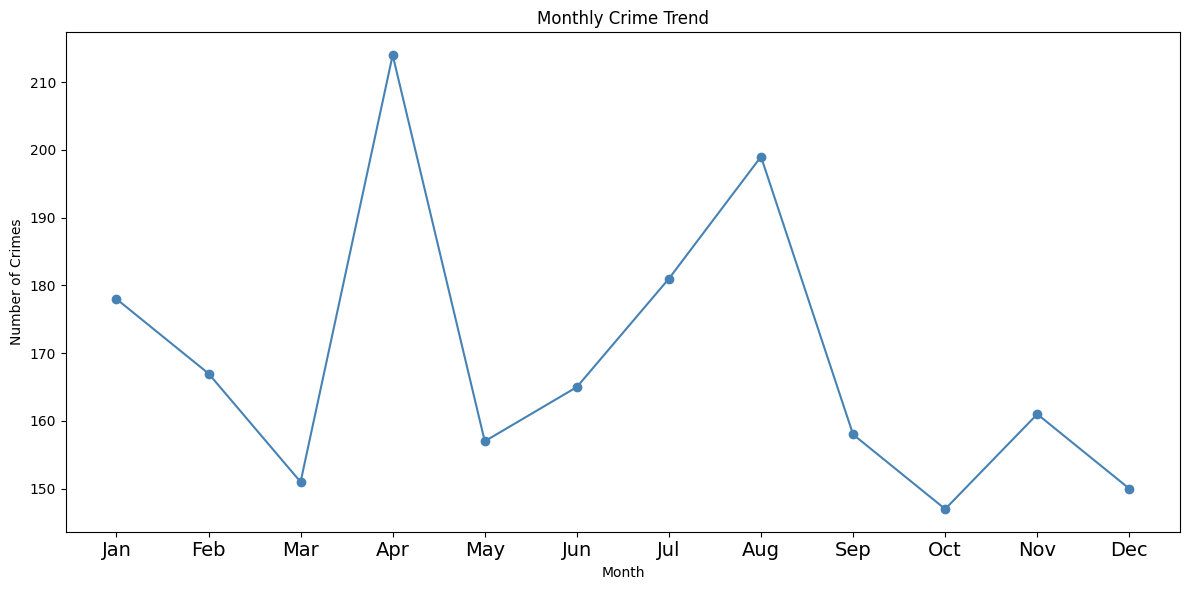

In [ ]:
# Objective 8: Monthly Crime Trend

# Count number of crimes in each month
monthly_crime = df['Month'].value_counts().sort_index()

# Plot the trend over time
plt.figure(figsize=(12, 6))
monthly_crime.plot(kind='line', marker='o', color='steelblue')
plt.title('Monthly Crime Trend')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(False)
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)
plt.tight_layout()
plt.show()

In [25]:
# Save statistics to CSV
df.to_csv("crime_data_cleaned.csv")